# <span style="color:red"> Dans ce projet nous allons traiter la base de données : Mobile Price  
</span>  


<span style="color:blue">
Indication :  
    
Bob commence sa propre compagnie de téléphone. 
Il veut livrer un combat acharné aux grandes entreprises comme Apple, Samsung..   
    
Il ne sait pas comment estimer le prix des mobiles crées par son entreprise.  
    
Dans ce marché concurrenciel de la téléphonie mobile, vous ne pouvez pas simplement supposer les choses. Pour résoudre ce problème, il recueille des données de vente de téléphones mobiles de diverses entreprises.  
    
Bob souhaite découvrir une relation entre les fonctionnalités d'un téléphone mobile (par exemple RAM, mémoire interne, etc) et son prix de vente. Mais il n'est pas bon en Machine Learning. Il a donc besoin de votre aide pour résoudre ce problème.  
    
Dans ce problème vous n'avez pas à prédire le prix réel mais une fourchette de prix indiquant le plus prix élevé.
    
</span>


In [57]:
#Library
import pandas
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import display, HTML

## Nous allons travailler sur les données Train.

In [38]:
# Lecture d'un fichier texte
data = pandas.read_csv("MobilePriceDescription/train.csv", header = 0, sep = ",")

In [39]:
type(data)

pandas.core.frame.DataFrame

In [40]:
data.shape

(2000, 21)

J'ai donc 1000 observations et 21 variables :

In [41]:
data.count()

battery_power    2000
blue             2000
clock_speed      2000
dual_sim         2000
fc               2000
four_g           2000
int_memory       2000
m_dep            2000
mobile_wt        2000
n_cores          2000
pc               2000
px_height        2000
px_width         2000
ram              2000
sc_h             2000
sc_w             2000
talk_time        2000
three_g          2000
touch_screen     2000
wifi             2000
price_range      2000
dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [43]:
list(data.columns)

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

## Statistiques descriptives univariés

La fonction describe( ) permet de décrire toutes les variables quantitatives d'un jeu de données directement.  

In [44]:
display(HTML(data.to_html()))
#Afficher toutes les variables

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [45]:
for i,j in enumerate(data.blue.isnull()):
       if j == True:
           print(i)

La base de données data ne contient aucune valeur manquante. 

In [46]:
display(HTML(data.describe().round(2).to_html()))
#Prends que les variables quantitatives 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.00,2000.0,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.0,2000.00,2000.00
mean,1238.52,0.5,1.52,0.51,4.31,0.52,32.05,0.50,140.25,4.52,9.92,645.11,1251.52,2124.21,12.31,5.77,11.01,0.76,0.5,0.51,1.50
std,439.42,0.5,0.82,0.50,4.34,0.50,18.15,0.29,35.40,2.29,6.06,443.78,432.20,1084.73,4.21,4.36,5.46,0.43,0.5,0.50,1.12
min,501.00,0.0,0.50,0.00,0.00,0.00,2.00,0.10,80.00,1.00,0.00,0.00,500.00,256.00,5.00,0.00,2.00,0.00,0.0,0.00,0.00
25%,851.75,0.0,0.70,0.00,1.00,0.00,16.00,0.20,109.00,3.00,5.00,282.75,874.75,1207.50,9.00,2.00,6.00,1.00,0.0,0.00,0.75
50%,1226.00,0.0,1.50,1.00,3.00,1.00,32.00,0.50,141.00,4.00,10.00,564.00,1247.00,2146.50,12.00,5.00,11.00,1.00,1.0,1.00,1.50
75%,1615.25,1.0,2.20,1.00,7.00,1.00,48.00,0.80,170.00,7.00,15.00,947.25,1633.00,3064.50,16.00,9.00,16.00,1.00,1.0,1.00,2.25
max,1998.00,1.0,3.00,1.00,19.00,1.00,64.00,1.00,200.00,8.00,20.00,1960.00,1998.00,3998.00,19.00,18.00,20.00,1.00,1.0,1.00,3.00


In [52]:
#Création d'une nouvelle table contenant seulement les variables quantitatives
col = [0,2,4,6,7,8,9,10,11,12,13,14,15,16]
data_quanti = data.iloc[: , col]

In [53]:
data_quanti

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19


## Visualisation des données pour la detection d'outlier
### Diagrammes à moustache des variables quantitatives

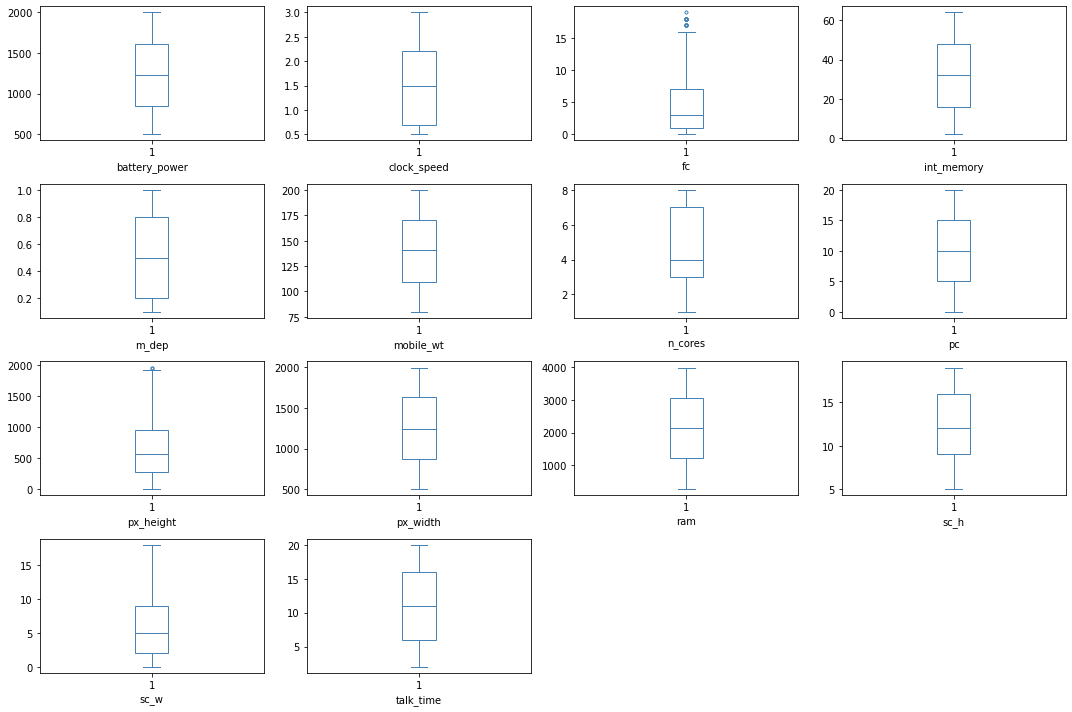

In [69]:
#Boxplot pour les variables quatitatives
c = 'steelblue'
blue_dict =  {'patch_artist': True,
             'boxprops': dict(color=c, facecolor='w'),
             'capprops': dict(color=c),
             'flierprops': dict(color=c, markeredgecolor=c,marker="."),
             'medianprops': dict(color=c),
             'whiskerprops': dict(color=c)}

plt.close()
plt.figure(figsize=(15,10))
for i in np.arange(start=0,stop=data_quanti.shape[1]):
    plt.subplot(4, 4, i+1)
    plt.boxplot(data_quanti.iloc[:,i],**blue_dict)
    plt.xlabel(data_quanti.columns[i])
plt.tight_layout()
plt.show()

Les boites à moustache nous permettent de détecter des valeurs extrêmes ou aberrantes pour des variables quantitatives. On remarque notamment pour la variable **fc** des valeurs qui semblent aberrantes.

In [70]:
data.fc.describe()

count    2000.000000
mean        4.309500
std         4.341444
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        19.000000
Name: fc, dtype: float64

In [74]:
data.fc.quantile([.01, .1, .9, .99])

0.01     0.0
0.10     0.0
0.90    11.0
0.99    16.0
Name: fc, dtype: float64

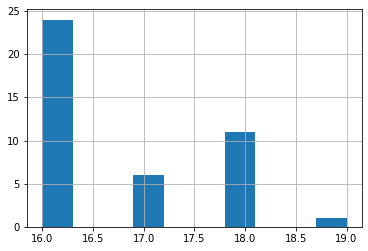

In [86]:
data.fc.where(data['fc']>=16).hist()

In [96]:
data[data['fc']==19]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1705,1290,1,1.4,1,19,1,35,0.3,110,4,...,405,742,879,16,2,8,1,0,0,0


Je ne sais pas si retirer ces valeurs car ce sont des types du téléphone, fc : fuel cell (type de batterie), je pense que je le garde, à voir avec groupe.

###  Représentation graphique des variables quantitatives
**Graphiques : Distribution des variables**

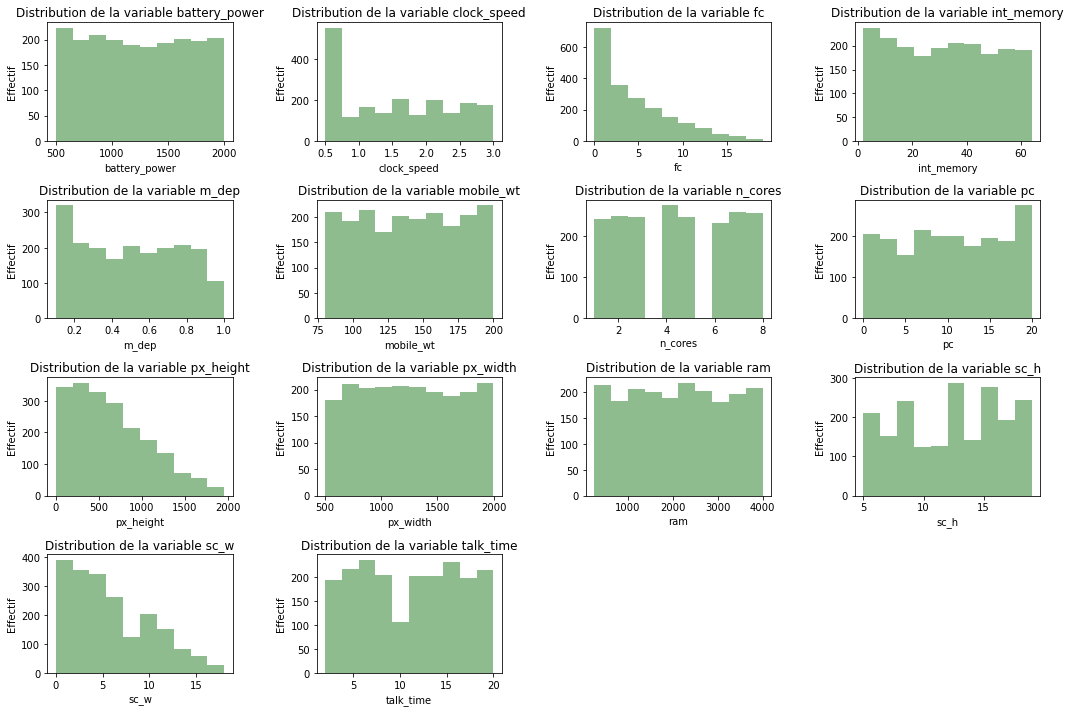

In [92]:
plt.figure(figsize=(15,10))
for i in np.arange(start=0,stop=data_quanti.shape[1]):
    plt.subplot(4, 4, i+1)
    plt.hist(data_quanti.iloc[: , i], color='darkseagreen')
    plt.xlabel(data_quanti.columns[i])
    plt.ylabel('Effectif')
    plt.title('Distribution de la variable ' + data_quanti.columns[i])
plt.tight_layout()
plt.show()

Les graphiques ci-dessus permettent de mieux visualiser comment se répartissent nos variables quantitatives, on peut voir avoir une idée de quels sont les caractéristiques les plus répendu parmi les téléphones mobiles.